# Second Assignment - Multi-Label Learning

 Chrysanthos Christou AΕM:90
 
 Ferdinantos Kottas ΑΕΜ:128 

# Introduction

In the second Assignment, our task involved addressing a scenario of multi-label learning. The dataset utilized for this exercise was called DeliciousMIL

The dataset is designed to assess the performance of multi-instance learning models by providing ground-truth class labels for both instance-level and bag-level predictions. It comprises a subset of tagged web pages sourced from the social bookmarking site delicious.com. Each page on this website was bookmarked by users and assigned word tags. To construct this dataset, the authors extracted relevant text portions from each web page and selected 20 commonly occurring tags as class labels. These labels include terms such as reference, design, programming, internet, computer, web, java, writing, English, grammar, style, language, books, education, philosophy, politics, religion, science, history, and culture. Randomly, 12,234 pages were chosen and divided into 8,251 training documents and 3,983 test documents. Additionally, the authors applied Porter stemming and standard stopword removal techniques.

Within the framework of multi-instance learning, each text document represents a bag that contains multiple sentences (instances). The objective is to predict class labels for both document-level and sentence-level classifications using a model trained solely on the document-level class labels provided in the training set.

# Task 1

Our objective for the first task of the second assignment is to implement two multi-label learning algorithms using the aforementioned dataset, where each document is represented as a bag of words.

# **Read libraries**

In [1]:
!pip install scikit-multilearn
!pip install liac-arff
from skmultilearn.dataset import load_dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp
import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

# Data Preprocessing

In [2]:
def convert_string_list_to_int(input_list):
    # Converting a list of numbers in string format to a list of numbers in integer format
    
    converted_list = []
    
    for num_str in input_list:
        converted_num = int(num_str)
        converted_list.append(converted_num)
        
    return converted_list

In [3]:
def load_bagged_data(data_path, is_verbose=0):
    # Loads the bagged data from the specified path
    # Input: data_path - the path from which the data will be loaded
    #        is_verbose - a value managing various output information
    # Output: The bagged data in coded form
    
    bags = []
    with open(data_path, "r") as data_file:
        for line in data_file:
            line_tokens = line.split(" ")
            line_tokens[-1] = line_tokens[-1][:-1]
            if is_verbose != 0:
                print("line_tokens 1: ", line_tokens)
            instances = int(line_tokens[0][1:-1])
            if is_verbose != 0:
                print("Instances = ", instances)
                print('')
            line_tokens = line_tokens[1:]
            if is_verbose != 0:
                print("line_tokens 2: ", line_tokens)
                print('\n\n\n')

            bag = []
            for _ in range(instances):
                sentence_len = int(line_tokens[0][1:-1])
                if is_verbose != 0:
                    print("sentence_len = ", sentence_len)

                line_tokens = line_tokens[1:]
                if is_verbose != 0:
                    print("line_tokens 3: ", line_tokens)

                sentence = line_tokens[:sentence_len]
                bag.append(convert_string_list_to_int(sentence))
                if is_verbose != 0:
                    print("sentence = ", sentence)

                line_tokens = line_tokens[sentence_len:]
                if is_verbose != 0:
                    print("line_tokens 4: ", line_tokens)
                    print('\n\n\n')

            if is_verbose != 0:
                print("BAG = ", bag)
            bags.append(bag)
            if is_verbose != 0:
                print("=====================================================================")

    return bags

In [4]:
def voc_to_words(bags, vocab, verbose = 0):
    # A method turning the coded words on our data in actual words
    for i in range(len(bags)):
        for j in range(len(bags[i])):
            if verbose != 0: print(bags[i][j])
            txt_list= vocab.iloc[bags[i][j]].values.tolist()
            txt_list_2 = [item for sublist in txt_list for item in sublist]
            if verbose != 0: print(txt_list_2)
#             print([type(k) for k in txt_list_2])
            txt = ""
            for k in range(len(txt_list_2)):
                if isinstance(txt_list_2[k], float):
                    txt += "" + " "
                else:
                    txt += txt_list_2[k] + " "
            txt = txt[:-1]
        
            if verbose != 0: print(txt)
            bags[i][j] = txt
        
    return bags

In [5]:
def convert_coded_data_to_words(bags, vocabulary, is_verbose=0):
    # Converts the coded words in the data to actual words using a vocabulary
    for i in range(len(bags)):
        for j in range(len(bags[i])):
            if is_verbose != 0:
                print(bags[i][j])
            
            txt_list = vocabulary.iloc[bags[i][j]].values.tolist()
            txt_list_flat = [item for sublist in txt_list for item in sublist]
            
            if is_verbose != 0:
                print(txt_list_flat)
            
            txt = " ".join(str(elem) for elem in txt_list_flat if not isinstance(elem, float))
        
            if is_verbose != 0:
                print(txt)
            
            bags[i][j] = txt
        
    return bags

In [6]:
cd C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής\Second Assignment\Data

C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής\Second Assignment\Data


In [7]:
vocab = pd.read_csv("vocabs.txt", names = ['word', 'code']).drop(columns = ["code"])

In [8]:
train_bags_encoded = load_bagged_data("train-data.dat", is_verbose = 0)
train_bags = voc_to_words(train_bags_encoded, vocab, verbose = 0)
train_labels =  np.loadtxt("train-label.dat", dtype = 'int', delimiter = " ", )

test_bags_encoded = load_bagged_data("test-data.dat", is_verbose = 0)
test_bags = voc_to_words(test_bags_encoded, vocab, verbose = 0)
test_labels =  np.loadtxt("test-label.dat", dtype = 'int', delimiter = " ", )

print(np.asarray(train_bags).shape, np.asarray(train_labels).shape, np.asarray(test_bags).shape, np.asarray(test_labels).shape)

(8251,) (8251, 20) (3983,) (3983, 20)


C:\Users\Meetings\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [9]:
# Flatten the bags and concatenate the sentences for both the train and test set
flattened_train_bags = []
for bag in train_bags:
    tmp = []
    for sentence in bag:
        tmp.append(sentence)
    flattened_train_bags.append(tmp)

for i in range(len(flattened_train_bags)):
    flattened_train_bags[i] = ' '.join(flattened_train_bags[i])
    

flattened_test_bags = []
for bag in test_bags:
    tmp = []
    for sentence in bag:
        tmp.append(sentence)
    flattened_test_bags.append(tmp)

for i in range(len(flattened_test_bags)):
    flattened_test_bags[i] = ' '.join(flattened_test_bags[i])

print(type(flattened_train_bags), np.asarray(flattened_train_bags).shape, type(flattened_test_bags), np.asarray(flattened_test_bags).shape)


<class 'list'> (8251,) <class 'list'> (3983,)


# Vectorizing And Normalizing Data

In [10]:
vocabulary = [item for sublist in vocab.values.tolist() for item in sublist]
for i in range(len(vocabulary)):
    if isinstance(vocabulary[i], float):
        vocabulary[i] = ""

vectorizer = CountVectorizer(vocabulary=vocabulary)
X_train = vectorizer.fit_transform(np.array(flattened_train_bags)).toarray()
feature_names_train = vectorizer.get_feature_names_out()
y_train = train_labels
print(X_train.shape)

vectorizer = CountVectorizer(vocabulary=vocabulary)
X_test = vectorizer.fit_transform(np.array(flattened_test_bags)).toarray()
feature_names_test = vectorizer.get_feature_names_out()
y_test = test_labels
print(X_test.shape)

check = all(item in feature_names_train for item in feature_names_test)
if check is True:
    print("The list feature_names_train contains all elements of the list feature_names_test")
else:
    print("No, feature_names_train doesn't have all elements of feature_names_test.")

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(8251, 8520)
(3983, 8520)
The list feature_names_train contains all elements of the list feature_names_test
(8251, 8520) (8251, 20) (3983, 8520) (3983, 20)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

In [13]:
# gridsearch for RF model
training = time.time()
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,5).tolist(), "max_depth": np.arange(1,5).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.054 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.065 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.055 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.073 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.059 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.054 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.067 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.055 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.060 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.058 total time=   0.4s
[CV 1/5]

In [14]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 1}
RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       977
           1       0.00      0.00      0.00       228
           2       0.00      0.00      0.00      1558
           3       0.00      0.00      0.00       372
           4       0.00      0.00      0.00      1050
           5       0.00      0.00      0.00       537
           6       0.00      0.00      0.00       702
           7       0.00      0.00      0.00      1079
           8       0.00      0.00      0.00       803
           9       0.00      0.00      0.00       483
          10       0.00      0.00      0.00       507
          11       0.00      0.00      0.00       478
          12       0.00      0.00      0.00       509
          13       0.00      0.00      0.00       355
          14       0.00      0.00      0.00       392
  

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [16]:
#Grid Search for LR model
training = time.time()
logreg = LogisticRegression()
clf = MultiOutputClassifier(logreg)
param_grid = {'estimator__penalty': ["l2"], "estimator__C": [0.1, 0.5, 1]}
grid = GridSearchCV(clf, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.055 total time=  26.4s
[CV 2/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.079 total time=  27.8s
[CV 3/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.061 total time=  28.0s
[CV 4/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.069 total time=  28.7s
[CV 5/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.059 total time=  26.6s
[CV 1/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.067 total time=  42.8s
[CV 2/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.087 total time=  44.3s
[CV 3/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.076 total time=  42.5s
[CV 4/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.084 total time=  40.0s
[CV 5/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.067 total time=  41.3s
[CV 1/5] END estimator__C=1, estimator__penalty=l2;, score=0.066 total time=  53

In [17]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'estimator__C': 0.5, 'estimator__penalty': 'l2'}
MultiOutputClassifier(estimator=LogisticRegression(C=0.5))
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       977
           1       0.77      0.16      0.26       228
           2       0.59      0.37      0.46      1558
           3       0.76      0.30      0.43       372
           4       0.70      0.34      0.46      1050
           5       0.57      0.14      0.22       537
           6       0.47      0.18      0.26       702
           7       0.68      0.30      0.42      1079
           8       0.63      0.17      0.27       803
           9       0.71      0.19      0.30       483
          10       0.74      0.14      0.24       507
          11       0.72      0.17      0.27       478
          12       0.57      0.12      0.20       509
          13       0.60      0.11      0.18       355
          14       0.73      0.27      0.39       392
          15       0.57   

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusions

For this first task each document was considered a bag of words. We used two different classifiers a Random Forest and a Logistic Regression model for multi-labeled instances. Both classifiers were tuned for their hyperparameters. The RF performed poorly and the logistic regression model had significantly higher performance with 66% weighted accuracy and 25% recall and 0.35 f1-score

# Task 2

Our firt objective in this second task of the second assignment was to represent each document as a "bag of sentences". In addition we redifined the problem from multiclass classification to binary classification by keeping the most common class and considering all 19 other classes as one 

In [18]:
# Flatten the bags and concatenate the sentences for both the train and test set
flat_train_bags = []
for i in range(len(train_bags)):
    flat_train_bags.append(' '.join(train_bags[i]))

flat_test_bags = []
for i in range(len(test_bags)):
    flat_test_bags.append(' '.join(test_bags[i]))

# Vectorize the data using a vocabulary and count the occurrences of sentences
vectorizer = CountVectorizer(vocabulary=vocabulary, analyzer='word')
X_train = vectorizer.fit_transform(flat_train_bags).toarray()
X_test = vectorizer.transform(flat_test_bags).toarray()

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the train and test labels
y_train = train_labels
y_test = test_labels

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8251, 8520) (8251, 20) (3983, 8520) (3983, 20)


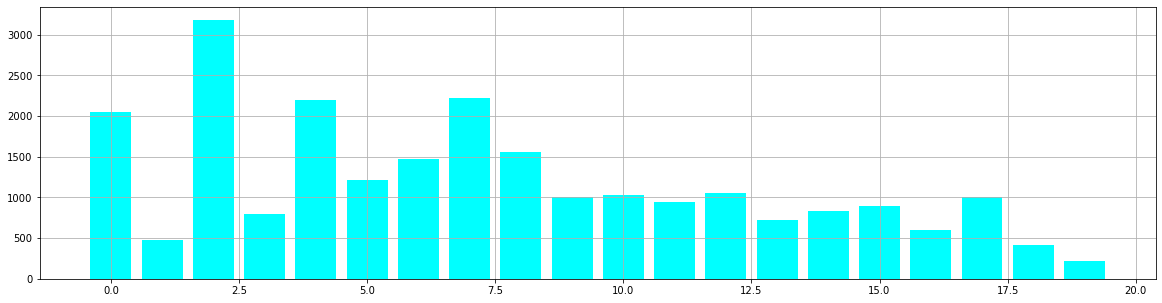

In [19]:
#finding the most common class
fig = plt.figure(figsize = (20, 5))
y_train = train_labels
plt.bar(np.arange(np.sum(y_train.T, axis = 1).shape[0]), np.sum(y_train.T, axis = 1), color ='cyan', width = 0.8)
plt.grid()
plt.show()

In [20]:
train_labels.shape

(8251, 20)

In [21]:
# Find the index of class 2 (assuming zero-based indexing)
class_index = 2

# Convert the labels to the binary problem
y_train_binary = np.where(train_labels[:, class_index] == 1, 1, 0)

# Verify the shape of the binary_labels array
print("Shape of binary_labels:", y_train_binary.shape)

# Print the updated binary labels
print("Updated binary labels:", y_train_binary)

Shape of binary_labels: (8251,)
Updated binary labels: [1 1 0 ... 0 1 0]


In [22]:
# Convert the labels to the binary problem
y_test_binary = np.where(test_labels[:, class_index] == 1, 1, 0)

# Verify the shape of the binary_labels array
print("Shape of binary_labels:", y_test_binary.shape)

# Print the updated binary labels
print("Updated binary labels:", y_test_binary)

Shape of binary_labels: (3983,)
Updated binary labels: [1 0 1 ... 0 0 1]


In [23]:
# gridsearch for RF model
training = time.time()
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,5).tolist(), "max_depth": np.arange(1,5).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train_binary)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.614 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.611 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.617 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.615 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.615 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.614 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.613 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.615 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.615 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.616 total time=   0.3s
[CV 1/5]

In [24]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test_binary, grid_predictions))

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 4}
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=4)
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      2425
           1       0.53      0.03      0.06      1558

    accuracy                           0.61      3983
   macro avg       0.57      0.51      0.41      3983
weighted avg       0.58      0.61      0.48      3983



In [25]:
#Grid Search for LR model
training = time.time()
logreg = LogisticRegression()
param_grid = {'penalty': ["l2"], "C": [0.1, 0.5, 1]}
grid = GridSearchCV(logreg, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train_binary)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.664 total time=   1.4s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.656 total time=   1.3s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.650 total time=   1.2s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.639 total time=   1.2s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.652 total time=   1.3s
[CV 1/5] END .................C=0.5, penalty=l2;, score=0.658 total time=   2.2s
[CV 2/5] END .................C=0.5, penalty=l2;, score=0.666 total time=   2.4s
[CV 3/5] END .................C=0.5, penalty=l2;, score=0.655 total time=   2.1s
[CV 4/5] END .................C=0.5, penalty=l2;, score=0.638 total time=   3.0s
[CV 5/5] END .................C=0.5, penalty=l2;, score=0.637 total time=   2.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.646 total time=   2.5s
[CV 2/5] END ...................C=1, penalty=l2;,

In [26]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test_binary, grid_predictions))

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
              precision    recall  f1-score   support

           0       0.66      0.91      0.76      2425
           1       0.65      0.26      0.37      1558

    accuracy                           0.65      3983
   macro avg       0.65      0.58      0.56      3983
weighted avg       0.65      0.65      0.61      3983



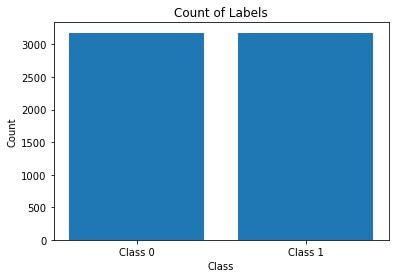

In [43]:
# Count the occurrences of each label
label_counts = y_train_binary.sum(axis=0)

# Get the class labels (assuming class 0 and class 1)
class_labels = ['Class 0', 'Class 1']

# Plot the count of each label
plt.bar(class_labels, label_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.show()

In [27]:
# gridsearch for RF model
training = time.time()
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,5).tolist(), "max_depth": np.arange(1,5).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.054 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.065 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.055 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.060 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.060 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.054 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.067 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.054 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.060 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.060 total time=   0.3s
[CV 1/5]

In [28]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 2}
RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=2)
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       977
           1       0.00      0.00      0.00       228
           2       0.48      0.01      0.02      1558
           3       1.00      0.00      0.01       372
           4       0.00      0.00      0.00      1050
           5       0.00      0.00      0.00       537
           6       1.00      0.00      0.00       702
           7       0.00      0.00      0.00      1079
           8       0.00      0.00      0.00       803
           9       0.86      0.01      0.02       483
          10       0.00      0.00      0.00       507
          11       0.00      0.00      0.00       478
          12       0.00      0.00      0.00       509
          13       0.00      0.00      0.00       355
          14       0.00      0.00      0.00       392
  

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Grid Search for LR model
training = time.time()
logreg = LogisticRegression()
clf = MultiOutputClassifier(logreg)
param_grid = {'estimator__penalty': ["l2"], "estimator__C": [0.1, 0.5, 1]}
grid = GridSearchCV(clf, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.055 total time=  27.9s
[CV 2/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.079 total time=  26.8s
[CV 3/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.061 total time=  26.3s
[CV 4/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.069 total time=  27.1s
[CV 5/5] END estimator__C=0.1, estimator__penalty=l2;, score=0.059 total time=  25.9s
[CV 1/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.067 total time=  43.8s
[CV 2/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.087 total time=  49.0s
[CV 3/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.076 total time=  57.7s
[CV 4/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.084 total time= 1.0min
[CV 5/5] END estimator__C=0.5, estimator__penalty=l2;, score=0.067 total time= 1.0min
[CV 1/5] END estimator__C=1, estimator__penalty=l2;, score=0.066 total time= 1.1

In [30]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'estimator__C': 0.5, 'estimator__penalty': 'l2'}
MultiOutputClassifier(estimator=LogisticRegression(C=0.5))
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       977
           1       0.77      0.16      0.26       228
           2       0.59      0.37      0.46      1558
           3       0.76      0.30      0.43       372
           4       0.70      0.34      0.46      1050
           5       0.57      0.14      0.22       537
           6       0.47      0.18      0.26       702
           7       0.68      0.30      0.42      1079
           8       0.63      0.17      0.27       803
           9       0.71      0.19      0.30       483
          10       0.74      0.14      0.24       507
          11       0.72      0.17      0.27       478
          12       0.57      0.12      0.20       509
          13       0.60      0.11      0.18       355
          14       0.73      0.27      0.39       392
          15       0.57   

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this final objective we represent each document as one bag containing its sentences.

In [31]:
# Flatten the bags and keep each document as a separate bag
flat_train_bags = [' '.join(bag) for bag in train_bags]
flat_test_bags = [' '.join(bag) for bag in test_bags]

# Vectorize the data using a vocabulary and analyze documents
vectorizer = CountVectorizer(vocabulary=vocabulary, analyzer='word')
X_train = vectorizer.fit_transform(flat_train_bags).toarray()
X_test = vectorizer.transform(flat_test_bags).toarray()

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the train and test labels
Y_train = train_labels
Y_test = test_labels

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(8251, 8520) (8251, 20) (3983, 8520) (3983, 20)


In [35]:
# gridsearch for RF model
training = time.time()
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,11).tolist(), "max_depth": np.arange(1,11).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.054 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.065 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.055 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.059 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.059 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.053 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.067 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.053 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.060 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.060 total time=   0.4s
[CV 1/

In [36]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 9}
RandomForestClassifier(max_depth=10, n_estimators=9)
              precision    recall  f1-score   support

           0       0.86      0.11      0.20       977
           1       0.00      0.00      0.00       228
           2       0.56      0.01      0.03      1558
           3       1.00      0.01      0.01       372
           4       0.82      0.01      0.02      1050
           5       0.00      0.00      0.00       537
           6       0.00      0.00      0.00       702
           7       0.50      0.00      0.00      1079
           8       1.00      0.00      0.00       803
           9       1.00      0.00      0.00       483
          10       0.00      0.00      0.00       507
          11       1.00      0.00      0.00       478
          12       0.00      0.00      0.00       509
          13       1.00      0.00      0.01       355
          14       1.00      0.00      0.01       392
          15       0.00 

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# gridsearch for LR model
training = time.time()
clf = MultiOutputClassifier(LogisticRegression())
param_grid = {'estimator__penalty': ["l2"], "estimator__C": np.arange(1,5).tolist()}
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END estimator__C=1, estimator__penalty=l2;, score=0.066 total time= 1.0min
[CV 2/5] END estimator__C=1, estimator__penalty=l2;, score=0.083 total time=  57.0s
[CV 3/5] END estimator__C=1, estimator__penalty=l2;, score=0.078 total time=  56.7s
[CV 4/5] END estimator__C=1, estimator__penalty=l2;, score=0.084 total time=  55.6s
[CV 5/5] END estimator__C=1, estimator__penalty=l2;, score=0.067 total time=  53.1s
[CV 1/5] END estimator__C=2, estimator__penalty=l2;, score=0.061 total time= 1.1min
[CV 2/5] END estimator__C=2, estimator__penalty=l2;, score=0.076 total time= 1.1min
[CV 3/5] END estimator__C=2, estimator__penalty=l2;, score=0.072 total time= 1.1min
[CV 4/5] END estimator__C=2, estimator__penalty=l2;, score=0.070 total time= 1.1min
[CV 5/5] END estimator__C=2, estimator__penalty=l2;, score=0.064 total time= 1.2min
[CV 1/5] END estimator__C=3, estimator__penalty=l2;, score=0.059 total time= 1.3min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END estimator__C=3, estimator__penalty=l2;, score=0.074 total time= 1.2min
[CV 3/5] END estimator__C=3, estimator__penalty=l2;, score=0.068 total time= 1.3min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV 4/5] END estimator__C=3, estimator__penalty=l2;, score=0.068 total time= 1.5min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END estimator__C=3, estimator__penalty=l2;, score=0.060 total time= 1.4min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV 1/5] END estimator__C=4, estimator__penalty=l2;, score=0.058 total time= 1.7min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV 2/5] END estimator__C=4, estimator__penalty=l2;, score=0.072 total time= 1.6min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV 3/5] END estimator__C=4, estimator__penalty=l2;, score=0.063 total time= 1.9min
[CV 4/5] END estimator__C=4, estimator__penalty=l2;, score=0.066 total time= 1.6min


C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV 5/5] END estimator__C=4, estimator__penalty=l2;, score=0.056 total time= 1.6min
Training time (sec):  1594.8801176548004


In [38]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'estimator__C': 1, 'estimator__penalty': 'l2'}
MultiOutputClassifier(estimator=LogisticRegression(C=1))
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       977
           1       0.73      0.20      0.31       228
           2       0.56      0.42      0.48      1558
           3       0.75      0.34      0.46       372
           4       0.67      0.38      0.49      1050
           5       0.49      0.16      0.24       537
           6       0.47      0.22      0.30       702
           7       0.64      0.34      0.45      1079
           8       0.61      0.22      0.32       803
           9       0.66      0.23      0.34       483
          10       0.67      0.20      0.31       507
          11       0.67      0.21      0.31       478
          12       0.51      0.15      0.23       509
          13       0.56      0.15      0.24       355
          14       0.68      0.31      0.43       392
          15       0.47      0

C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Grid Search for LR model
training = time.time()
logreg = LogisticRegression()
param_grid = {'penalty': ["l2"], "C": [0.1, 0.5, 1]}
grid = GridSearchCV(logreg, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train_binary)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.664 total time=   2.6s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.656 total time=   3.4s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.650 total time=   1.5s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.639 total time=   2.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.652 total time=   1.4s
[CV 1/5] END .................C=0.5, penalty=l2;, score=0.658 total time=   2.6s
[CV 2/5] END .................C=0.5, penalty=l2;, score=0.666 total time=   2.5s
[CV 3/5] END .................C=0.5, penalty=l2;, score=0.655 total time=   4.0s
[CV 4/5] END .................C=0.5, penalty=l2;, score=0.638 total time=   2.5s
[CV 5/5] END .................C=0.5, penalty=l2;, score=0.637 total time=   2.1s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.646 total time=   2.8s
[CV 2/5] END ...................C=1, penalty=l2;,

In [40]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test_binary, grid_predictions))

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
              precision    recall  f1-score   support

           0       0.66      0.91      0.76      2425
           1       0.65      0.26      0.37      1558

    accuracy                           0.65      3983
   macro avg       0.65      0.58      0.56      3983
weighted avg       0.65      0.65      0.61      3983



# Conclusions

Regarding the second task we utilized the same classifiers to compare their performance when the document is perceived as a bag of sentences or a the whole document as one bag. First, we redefined the problem into a binary problem. All documents that had 1 in the position of vector coresponding to the most common class (class 3) was considered 1, while any document that did not include the class 3 label was given a 0 label. Since class 3 was the most common, the two new classes 0 and 1 were mostly balanced. The LR model again outperformed the RF with a 65% macro average while the recall for the 1 class was 26%. We then checked the performance of the models in the original 20 class problem, but this time with each document being represented as a bag of sentences. The RF model again performed poorly. The first RF model were each document was considered a bag of words had higher performance than the second RF model. Regarding the performance of the LR in the original 20 class problemm, the model demonstrated 66% weighted average with 25% recall and 0.35 f1-score. The model performed similarly independently of how the document was perceived.
Finally, we develop 3 more models this time perceiving each document as its own bag. The first two models were trained on the original 20 class problem. This time we performed a GridSearch that allowed a deeper depth and higher number of estimators for the RF model. It seems that allowing for deeper structures significantly improved the performance of the RF model demonstrating a weighted accuracy of 53%. Nevertheless, the LR model still outperformed the RF with 62% weighted accuracy, 29% recal and 0.39 f1-score. Its performance was slightly higher compared with the first two 20-class problems. Finally, the LR model was tested in the binary problem with the document being perceived as its own bag. The model demonstrated 65% macro accuracy 26% recall for 1 class and performed simirarly with the other binary LR model.
The RF model was not tested for deeper depth and number of estimators in the initial problems and that constitutes a limitation of this project.